# Resúmenes de los Premios de Investigación de la NSF

## 1. Objetivo del proyecto (Entendimiento del problema)

**Objetivo**: Desarrollar un modelo no supervisado que clasifique los resúmenes en un tópico basado en la similitud semántica.

En el siguiente link se encuentran los archivos que contienen los resúmenes que se encuentran en formato *xml* https://www.nsf.gov/awardsearch/download?DownloadFileName=2020&All=true

## 2. Obtención de los datos 

- ¿Qué información encuentro en los archivos?

In [3]:
import pandas as pd

df_abst = pd.read_xml('./2020/2000005.xml', encoding='utf-8')
print('número de columnas: ', len(df_abst.columns), '\nColumnas: ', df_abst.columns)
df_abst


número de columnas:  27 
Columnas:  Index(['AwardTitle', 'AGENCY', 'AwardEffectiveDate', 'AwardExpirationDate',
       'AwardTotalIntnAmount', 'AwardAmount', 'AwardInstrument',
       'Organization', 'ProgramOfficer', 'AbstractNarration',
       'MinAmdLetterDate', 'MaxAmdLetterDate', 'ARRAAmount', 'TRAN_TYPE',
       'CFDA_NUM', 'NSF_PAR_USE_FLAG', 'FUND_AGCY_CODE', 'AWDG_AGCY_CODE',
       'AwardID', 'Investigator', 'Institution', 'Performance_Institution',
       'ProgramElement', 'ProgramReference', 'Appropriation', 'Fund',
       'FUND_OBLG'],
      dtype='object')


,AwardTitle,AGENCY,AwardEffectiveDate,AwardExpirationDate,AwardTotalIntnAmount,AwardAmount,AwardInstrument,Organization,ProgramOfficer,AbstractNarration,...,AWDG_AGCY_CODE,AwardID,Investigator,Institution,Performance_Institution,ProgramElement,ProgramReference,Appropriation,Fund,FUND_OBLG
0,Collaborative Research: Excellence in Research...,NSF,07/01/2020,06/30/2023,229338.0,345460,NaN,NaN,NaN,Head and heart development are closely intertw...,...,4900,2000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021~116122


In [38]:
df_abst.iloc[:,:15]

,AwardTitle,AGENCY,AwardEffectiveDate,AwardExpirationDate,AwardTotalIntnAmount,AwardAmount,AwardInstrument,Organization,ProgramOfficer,AbstractNarration,MinAmdLetterDate,MaxAmdLetterDate,ARRAAmount,TRAN_TYPE,CFDA_NUM
0,Collaborative Research: Excellence in Research...,NSF,07/01/2020,06/30/2023,229338.0,345460,NaN,NaN,NaN,Head and heart development are closely intertw...,06/29/2020,08/03/2021,NaN,Grant,47.074


In [39]:
df_abst.iloc[:,15:]

,NSF_PAR_USE_FLAG,FUND_AGCY_CODE,AWDG_AGCY_CODE,AwardID,Investigator,Institution,Performance_Institution,ProgramElement,ProgramReference,Appropriation,Fund,FUND_OBLG
0,1,4900,4900,2000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021~116122


Se observa que "AbstractNarration" es la columna que contiene el resumen que se necesita clasificar. Mientras que las demás columnas, en este proyecto no se necesitarán, pues no dan más información para descubrir el tópico del que se habla en el resumen. 

¿Podría ser necesario también el título para definir con mayor precisión el tópico del resumen?



A continuación, se hará una concatenación de todos los archivos en un solo Data Frame.

In [24]:
import os
import glob
import xml.etree.ElementTree as ET

path_files = './2020/'
xml_files = glob.glob(os.path.join(path_files, "*.xml"))
column_list = ['AbstractNarration']
abstract_list =[]

for file in xml_files:
    tree = ET.parse(file)
    root = tree.getroot()
    abstract_list.append([root[0][9].text])

df_abstract = pd.DataFrame(abstract_list, columns=['Abstract'])

In [25]:
print('Tamaño del DataFrame: ',df_abstract.shape)
df_abstract.head(10)

Tamaño del DataFrame:  (13294, 1)


,Abstract
0,Title: NSF Workshop on Future Wireless Researc...
1,This Research Experience for Undergraduates (R...
2,"Global science relies on robust, interconnecte..."
3,Human contacts underlie the spread of any infe...
4,Networks provide a powerful and compact repres...
5,Databases that contain information about peopl...
6,The NSF Convergence Accelerator supports use-i...
7,Nontechnical Summary&lt;br/&gt;&lt;br/&gt;This...
8,The broader impact of this Small Business Inno...
9,This NSF INCLUDES planning grant is funded by ...


## 3. Limpieza de Datos

Ya que se tiene toda la información que se requiere en el data frame, se observará la calidad de datos de éste.

In [26]:
df_abstract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13294 entries, 0 to 13293
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Abstract  13153 non-null  object
dtypes: object(1)
memory usage: 104.0+ KB


Con el método info() se puede ver que existen algunas filas con NaN. En este proyecto es necesario conocer el resumen para poder clasificarlo, por lo que se eliminarán esas filas.

In [27]:
df_abstract = df_abstract.dropna()
df_abstract.shape

(13153, 1)

Se han eliminado los valores NaN y se puede comprobar con la siguiente línea

In [28]:
df_abstract['Abstract'].isnull().sum()

0

En la siguiente celda, se observará un ejemplo del tipo de limpieza que se debe hacer a la cadena de texto. ¿Qué signos, erroes ó typos se pueden encontrar y hay que eliminar para que no haya ruido en el modelo?

In [29]:
df_abstract['Abstract'][7][:1000]

"Nontechnical Summary&lt;br/&gt;&lt;br/&gt;This award is made on an EAGER proposal invited through the Quantum Algorithm Challenge Dear Colleague Letter. It supports research and education to develop and implement algorithms to run on quantum computers that currently exist or will exist in the near future. A perfect quantum computer is expected to solve certain problems of practical interest much faster than any conventional computer, also called a classical computer. Examples include factoring large numbers into primes with Shor's algorithm and using Lloyd's algorithm to predict the time evolution of an interacting quantum system away from equilibrium. The latter could help in optimization and design of new biomaterials, drugs, and functional quantum materials. While the past few years have brought tremendous progress in efforts to build a perfect quantum computer, the current noisy intermediate-scale quantum (NISQ) technology is potentially decades away from being able to run Shor's 

' Nontechnical Summary \&lt; br/ \&gt; \&lt;br/ \&gt;/%' En la primer línea se pueden ver algunos tipos del formato xml que se pueden eliminar, pues podrían modificar los resultados del análisis. 

Por otro lado, para que haya una uniformidad en las cadenas de texto, habrá que convertir todas las palabras a minúsculas, pues una palabra con mayúscula podría considerarse como 2. 

Se construirá una función para eliminar o modificar las cadenas de texto

In [30]:
import re
import string

def clean_string(text):
    text = text.lower() 
    text = re.sub('&lt;br/&gt;&lt;br/&gt',' ',text)
    text = re.sub('br',' ',text)
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('�', ' ', text)
    return text

In [31]:
df_abstract['Abstract'] = df_abstract['Abstract'].apply(lambda x: clean_string(x))
df_abstract.head(10)

,Abstract
0,title nsf workshop on future wireless researc...
1,this research experience for undergraduates r...
2,global science relies on robust interconnecte...
3,human contacts underlie the spread of any infe...
4,networks provide a powerful and compact repres...
5,databases that contain information about peopl...
6,the nsf convergence accelerator supports use i...
7,nontechnical summary this award is made on an...
8,the oader impact of this small business innov...
9,this nsf includes planning grant is funded by ...


Ejemplo de limpieza del resumen de la fila 7

In [32]:
df_abstract['Abstract'][7][:500]

'nontechnical summary  this award is made on an eager proposal invited through the quantum algorithm challenge dear colleague letter  it supports research and education to develop and implement algorithms to run on quantum computers that currently exist or will exist in the near future  a perfect quantum computer is expected to solve certain problems of practical interest much faster than any conventional computer  also called a classical computer  examples include factoring large numbers into pr'

Se muestra limpio de signos de puntuación, typos del xml y todas las palabras en minúsculas.

## 4. Preprocesamiento de Datos

Una vez que el dataset está limpio, aún se requiere procesar los datos para poder hacer uso de éstos en un modelo. 

Lo siguiente es hacer uso de la librería Scikit Learn para vectorizar las palabras de cada uno de los resúmenes. 

Se utilizará el método TfidfVectorizer que compara el número de veces que aparece una palabra en una fila con el total de veces que aparece en todas las filas. 

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvectorizer = TfidfVectorizer(stop_words='english')
tfidf_term_vectors = tfidfvectorizer.fit_transform(df_abstract['Abstract'])

El método TfidfVectorizer() tiene como parámetro stop_words ='english', esto porque al ser texto que está en inglés, el conjunto 'english' elimina las palabras conectoras o comunes en inglés como: and, in, or, etc

In [34]:
tfidf_term_vectors

<13153x46946 sparse matrix of type '<class 'numpy.float64'>'
	with 2279658 stored elements in Compressed Sparse Row format>

En tfidf_term_vectors se tiene una matriz con los 13,153 resúmenes en las filas y 47,108 columnas que son cada una de las palabras a clasificar.

## 5. Modelación de Datos

El modelo que se utilizará para la clasificación de los tópicos de los resúmens es el modelo NMF (Non Negative Matrix Factorization) que es un modelo que reduce dimensiones. 

El número de dimensiones las determina el usuario y a partir de este número y el peso que ya se obtuvo con el pre procesamiento, mientras más alto es el valor mayor relación tendrá en la clasificación de una dimensión (ó tópicos).

El número de tópicos con los que se experimentará será de 3 a 8 y se observará el comportamiento de las similitudes. De ser necesario se agregarán iteraciones.

In [35]:
from sklearn.decomposition import NMF

for i in range(3,9):
    print(f'=============== {i} TÓPICOS =============')
    nmf_model = NMF(n_components = i,random_state=42)
    nmf_model.fit(tfidf_term_vectors)
    
    print("record size : ",len(tfidfvectorizer.get_feature_names_out()))

    for index,topic in enumerate(nmf_model.components_):
        print(f'Palabras en el tópico #{index}')
        print([tfidfvectorizer.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
        print('\n')
    

=============== 3 TÓPICOS =============
record size :  46946
Palabras en el tópico #0
['time', 'model', 'new', 'human', 'using', 'systems', 'network', 'health', 'social', 'models', 'learning', 'research', 'covid', 'project', 'data']


Palabras en el tópico #1
['university', 'college', 'mathematics', 'faculty', 'student', 'engineering', 'science', 'teachers', 'project', 'learning', 'program', 'research', 'education', 'students', 'stem']


Palabras en el tópico #2
['students', 'devices', 'manufacturing', 'applications', 'systems', 'theory', 'high', 'physics', 'project', 'new', 'properties', 'energy', 'research', 'materials', 'quantum']


=============== 4 TÓPICOS =============
record size :  46946
Palabras en el tópico #0
['methods', 'new', 'networks', 'health', 'network', 'machine', 'systems', 'research', 'algorithms', 'models', 'social', 'covid', 'project', 'learning', 'data']


Palabras en el tópico #1
['university', 'college', 'mathematics', 'faculty', 'student', 'engineering', 'lear

## 6. Interpretación de los resultados

En los resultados se observa que en el número de tópicos= 3 y 4 no se puede ver con claridad la clasificación de los tópicos.

En el número de tópicos = 5 se pueden clasificar mejor los temas:
- computación
- universidad
- ciencias
- calentamiento global
- covid

En el número de tópicos = 6 parece que se divide el de ciencias y en lugar de ésta, se tiene:
- bio-química
- matemáticas

En el número de tópicos =  7 aparece un nuevo tópico, que parece que tiene que ver con:
- computación cuántica

En el número de tópicos = 8 ya empieza a parecerse el tópico de universidad, no se logra distinguir la diferencia entre éstos. 

Por tanto, se considerará que el número de tópicos que mejor clasifica es el 7.

A continuación se muestra gráficamente cada tópico con el conjunto de las palabras y su peso. 

El Topico # 0


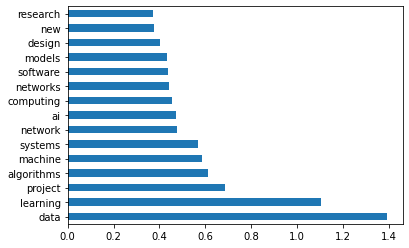

El Topico # 1


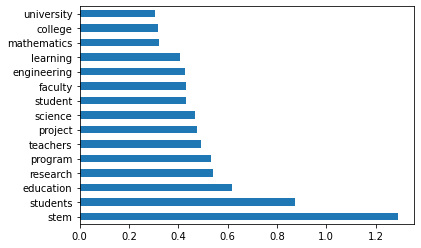

El Topico # 2


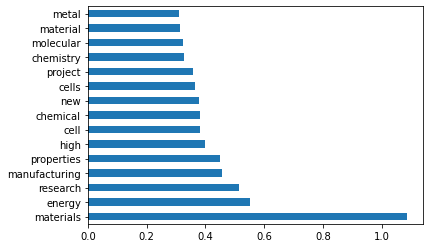

El Topico # 3


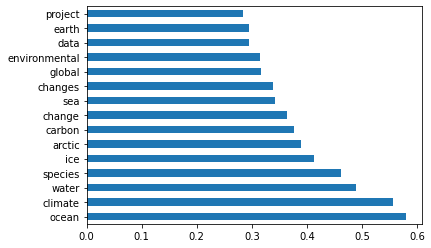

El Topico # 4


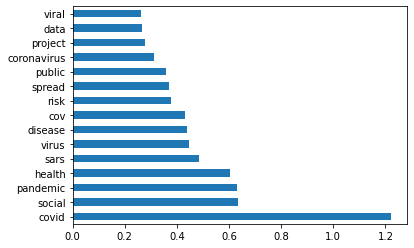

El Topico # 5


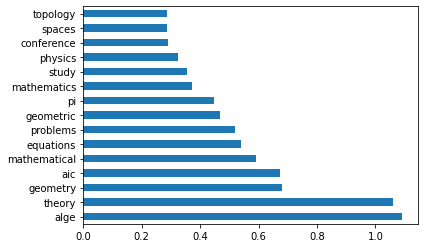

El Topico # 6


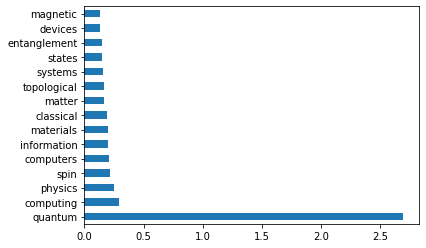

In [41]:
import matplotlib.pyplot as plt

nmf_model = NMF(n_components = 7,random_state=42)
nmf_model.fit(tfidf_term_vectors)

components_df = pd.DataFrame(nmf_model.components_, columns=tfidfvectorizer.get_feature_names_out())
for topic in range(components_df.shape[0]):
    print('El Topico # {}'.format(topic))
    df_comp = components_df.iloc[topic].nlargest(15)
    df_comp.plot.barh()    
    plt.show()  

## 7. Conclusiones

Finalmente, se crea una nueva columna en el dataframe que contiene la clasificación del resumen por tópico.

In [44]:
topic_results = nmf_model.transform(tfidf_term_vectors)
df_abstract['Num_Topic'] = topic_results.argmax(axis=1)
topicos = {0:'Ciencia de Datos', 1:'Universidad', 2:'Ingeniería Materiales', 3:'Calentamiento Global', 4:'COVID', 5:'Matemáticas', 6:'Computación Cuántica' }
df_abstract['Clasificación'] = df_abstract['Num_Topic'].map(topicos)
df_abstract.head(20)

,Abstract,Num_Topic,Clasificación
0,title nsf workshop on future wireless researc...,0,Ciencia de Datos
1,this research experience for undergraduates r...,1,Universidad
2,global science relies on robust interconnecte...,0,Ciencia de Datos
3,human contacts underlie the spread of any infe...,4,COVID
4,networks provide a powerful and compact repres...,0,Ciencia de Datos
5,databases that contain information about peopl...,4,COVID
6,the nsf convergence accelerator supports use i...,0,Ciencia de Datos
7,nontechnical summary this award is made on an...,6,Computación Cuántica
8,the oader impact of this small business innov...,2,Ingeniería Materiales
9,this nsf includes planning grant is funded by ...,0,Ciencia de Datos


Se ha cumplido con el objetivo de clasificar los resúmenes en tópicos.

Para una siguiente etapa, se consideraría integrar a la cadena del resumen al título, pues normalmente éste describe en pocas palabras el trabajo.